# INFOTECH ACADEMY MACHINE LEARNING-1 HOMEWORK

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
 
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
    

### Load Dataset

In [2]:
df = pd.read_csv('titanic_dataset.csv')
df.head()

,Unnamed: 0,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


## Step 1: Define the Problem

Clearly define the problem you want to solve using the Titanic dataset. For example, you could predict whether a passenger survived or not based on various features.

### This is an imbalanced classification

## Step 2: Gather and Explore the Data

Obtain the Titanic dataset from a reliable source, such as Kaggle.
Explore the dataset to understand its structure and variables.
Identify the features that are available and their potential relevance to the problem.

In [3]:
df.describe()

,Unnamed: 0,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,12970.000000,12700.000000,12707.000000,12681.000000,12664.000000,12686.000000,12702.000000
mean,3617.887741,28.771969,222.897852,451.961675,174.906033,308.476904,306.789482
std,2408.607419,14.387261,647.596664,1584.370747,590.558690,1130.279641,1180.097223
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1621.000000,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3242.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,5449.750000,38.000000,49.000000,77.000000,29.000000,57.000000,42.000000
max,8692.000000,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12970 entries, 0 to 12969
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    12970 non-null  int64  
 1   PassengerId   12970 non-null  object 
 2   HomePlanet    12682 non-null  object 
 3   CryoSleep     12660 non-null  object 
 4   Cabin         12671 non-null  object 
 5   Destination   12696 non-null  object 
 6   Age           12700 non-null  float64
 7   VIP           12674 non-null  object 
 8   RoomService   12707 non-null  float64
 9   FoodCourt     12681 non-null  float64
 10  ShoppingMall  12664 non-null  float64
 11  Spa           12686 non-null  float64
 12  VRDeck        12702 non-null  float64
 13  Name          12676 non-null  object 
 14  Transported   12970 non-null  bool   
dtypes: bool(1), float64(6), int64(1), object(7)
memory usage: 1.4+ MB


In [5]:
df.shape

(12970, 15)

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,12970.0,3617.887741,2408.607419,0.0,1621.0,3242.0,5449.75,8692.0
Age,12700.0,28.771969,14.387261,0.0,19.0,27.0,38.00,79.0
RoomService,12707.0,222.897852,647.596664,0.0,0.0,0.0,49.00,14327.0
FoodCourt,12681.0,451.961675,1584.370747,0.0,0.0,0.0,77.00,29813.0
ShoppingMall,12664.0,174.906033,590.558690,0.0,0.0,0.0,29.00,23492.0
Spa,12686.0,308.476904,1130.279641,0.0,0.0,0.0,57.00,22408.0
VRDeck,12702.0,306.789482,1180.097223,0.0,0.0,0.0,42.00,24133.0


In [7]:
df.nunique()

Unnamed: 0       8693
PassengerId     12970
HomePlanet          3
CryoSleep           2
Cabin            9825
Destination         3
Age                80
VIP                 2
RoomService      1578
FoodCourt        1953
ShoppingMall     1367
Spa              1679
VRDeck           1642
Name            12629
Transported         2
dtype: int64

In [8]:
df.isnull().sum() 

Unnamed: 0        0
PassengerId       0
HomePlanet      288
CryoSleep       310
Cabin           299
Destination     274
Age             270
VIP             296
RoomService     263
FoodCourt       289
ShoppingMall    306
Spa             284
VRDeck          268
Name            294
Transported       0
dtype: int64

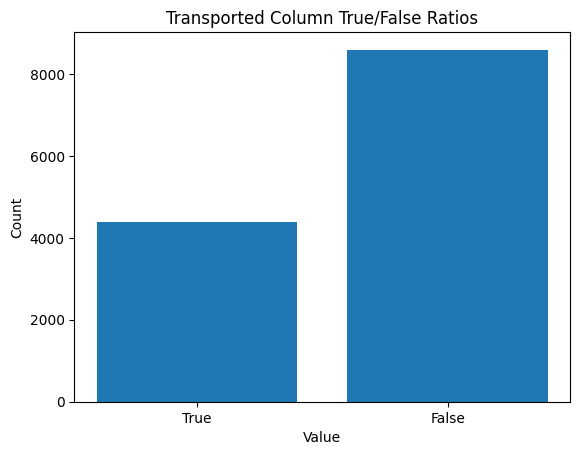

In [9]:
import matplotlib.pyplot as plt

# Calculate the counts of "True" and "False" values
true_count = df["Transported"].sum()
false_count = len(df) - true_count

# Create a dataframe with the ratios
ratios = pd.DataFrame({"Value": ["True", "False"], "Ratio": [true_count, false_count]})

# Visualize the ratios
plt.bar(ratios["Value"], ratios["Ratio"])
plt.xlabel("Value")
plt.ylabel("Count")
plt.title("Transported Column True/False Ratios")
plt.show()


## Step 3: Preprocess the Data

* Handle missing values by imputing or removing them appropriately.
* Detect and handle outliers using techniques such as:
    - **Visualization** : Plot box plots or histograms to identify potential outliers.
    - **Statistical methods**: Calculate z-scores or interquartile ranges to identify and handle outliers.
* Transform categorical variables into numerical representations (e.g., one-hot encoding).
* Normalize or scale numerical features as needed.

In [11]:
df.isnull().sum()

Unnamed: 0        0
PassengerId       0
HomePlanet      288
CryoSleep       310
Cabin           299
Destination     274
Age             270
VIP             296
RoomService     263
FoodCourt       289
ShoppingMall    306
Spa             284
VRDeck          268
Name            294
Transported       0
dtype: int64

In [12]:
# Specify the column names and their null counts
column_names = ["PassengerId", "HomePlanet", "CryoSleep", "Cabin", "Destination", "Age", "VIP", "RoomService",
                "FoodCourt", "ShoppingMall", "Spa", "VRDeck", "Name", "Transported"]
null_counts = [0, 288, 310, 299, 274, 270, 296, 263, 289, 306, 284, 268, 294, 0]

# Calculate the percentage of null values for each column
total_rows = df.shape[0]
for column, null_count in zip(column_names, null_counts):
    percentage = (null_count / total_rows) * 100
    print(f"{column}: {percentage:.2f}%")


PassengerId: 0.00%
HomePlanet: 2.22%
CryoSleep: 2.39%
Cabin: 2.31%
Destination: 2.11%
Age: 2.08%
VIP: 2.28%
RoomService: 2.03%
FoodCourt: 2.23%
ShoppingMall: 2.36%
Spa: 2.19%
VRDeck: 2.07%
Name: 2.27%
Transported: 0.00%


In [13]:
df['Age'].mean()

28.771968503937007

In [14]:
df['Age'] = df['Age'].fillna(df['Age'].mean())

In [15]:
df['RoomService'] = df['RoomService'].fillna(df['RoomService'].mean())

In [16]:
df['FoodCourt'] = df['FoodCourt'].fillna(df['FoodCourt'].mean())

In [17]:
df['ShoppingMall'] = df['ShoppingMall'].fillna(df['ShoppingMall'].mean())

In [18]:
df['Spa'] = df['Spa'].fillna(df['Spa'].mean())

In [20]:
df['VRDeck'] = df['VRDeck'].fillna(df['VRDeck'].mean())

In [21]:
df.isnull().sum()

Unnamed: 0        0
PassengerId       0
HomePlanet      288
CryoSleep       310
Cabin           299
Destination     274
Age               0
VIP             296
RoomService       0
FoodCourt         0
ShoppingMall      0
Spa               0
VRDeck            0
Name            294
Transported       0
dtype: int64

In [22]:
df.head()

,Unnamed: 0,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [23]:
df["CryoSleep"] = df["CryoSleep"].map({True: 1, False: 0})
df["VIP"] = df["VIP"].map({True: 1, False: 0})
df.head()

,Unnamed: 0,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0,0001_01,Europa,0.0,B/0/P,TRAPPIST-1e,39.0,0.0,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,1,0002_01,Earth,0.0,F/0/S,TRAPPIST-1e,24.0,0.0,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,2,0003_01,Europa,0.0,A/0/S,TRAPPIST-1e,58.0,1.0,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,3,0003_02,Europa,0.0,A/0/S,TRAPPIST-1e,33.0,0.0,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,4,0004_01,Earth,0.0,F/1/S,TRAPPIST-1e,16.0,0.0,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [24]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


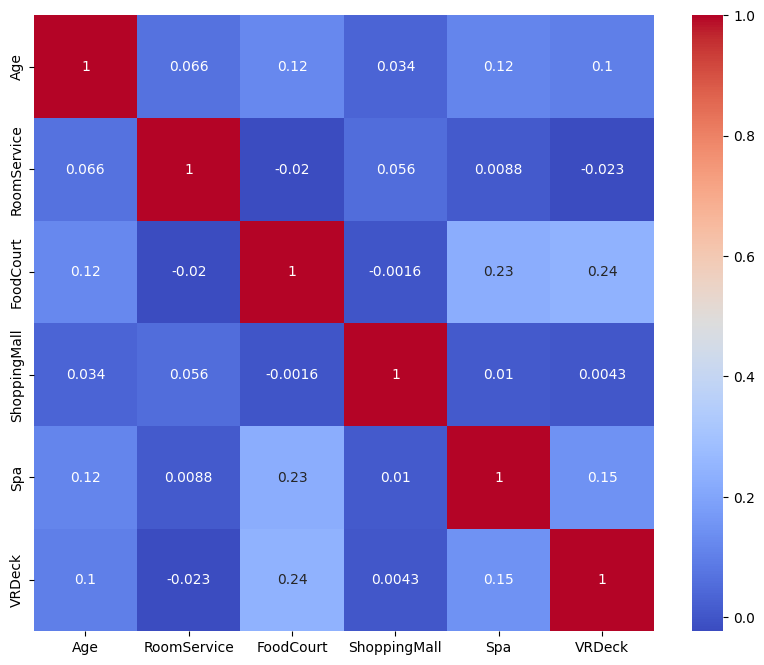

In [26]:
import seaborn as sns

#Select only numeric columns
numeric_columns =  ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']

data_numeric = df[numeric_columns]

#Calculate the correlation matrix
correlation_matrix = data_numeric.corr()

#Visualize the correlation matrix as a heatmap 
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()



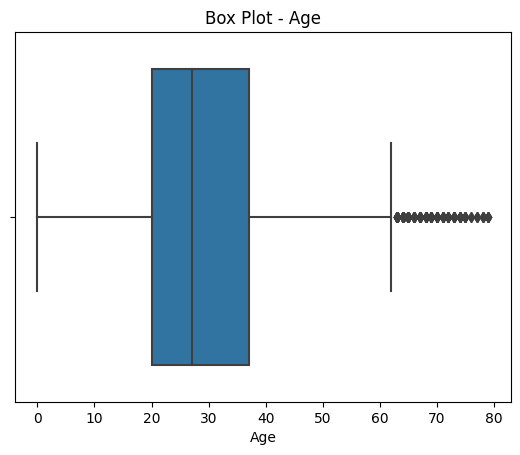

In [27]:
sns.boxplot(x=df['Age'])
plt.xlabel('Age')
plt.title('Box Plot - Age')
plt.show()

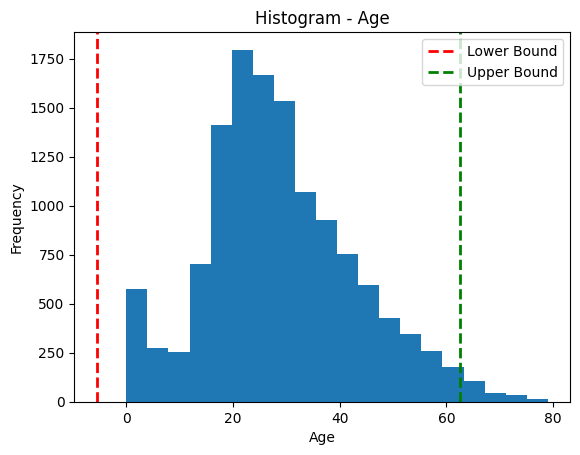

In [28]:
Q1 = df['Age'].quantile(0.25)
Q3 = df['Age'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['Age'] < lower_bound) | (df['Age'] > upper_bound)]

plt.hist(df['Age'], bins=20)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Histogram - Age')
plt.axvline(x=lower_bound, color='r', linestyle='--', linewidth=2, label='Lower Bound')
plt.axvline(x=upper_bound, color='g', linestyle='--', linewidth=2, label='Upper Bound')
plt.legend()
plt.show()


In [24]:
# Define the function to calculate Z-scores
def detect_outliers_zscore(data, threshold=3):
    z_scores = (data - np.mean(data)) / np.std(data)
    outliers = np.abs(z_scores) > threshold
    return outliers

age = df['Age']
outliers_zscore = detect_outliers_zscore(age)
outliers_zscore_values = age[outliers_zscore]
mean_age = np.mean(age)
age[outliers_zscore]=mean_age

df.loc[outliers_zscore, 'Age'] = mean_age

print(df)

       Unnamed: 0 PassengerId HomePlanet  CryoSleep     Cabin    Destination   
0               0     0001_01     Europa        0.0     B/0/P    TRAPPIST-1e  \
1               1     0002_01      Earth        0.0     F/0/S    TRAPPIST-1e   
2               2     0003_01     Europa        0.0     A/0/S    TRAPPIST-1e   
3               3     0003_02     Europa        0.0     A/0/S    TRAPPIST-1e   
4               4     0004_01      Earth        0.0     F/1/S    TRAPPIST-1e   
...           ...         ...        ...        ...       ...            ...   
12965        4272     9266_02      Earth        1.0  G/1496/S    TRAPPIST-1e   
12966        4273     9269_01      Earth        0.0       NaN    TRAPPIST-1e   
12967        4274     9271_01       Mars        1.0   D/296/P    55 Cancri e   
12968        4275     9273_01     Europa        0.0   D/297/P            NaN   
12969        4276     9277_01      Earth        1.0  G/1498/S  PSO J318.5-22   

             Age  VIP  RoomService  Foo

C:\Users\90506\AppData\Local\Temp\ipykernel_11136\2037291522.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  age[outliers_zscore]=mean_age


## Step 4: Check for Normality

Perform a normality check on the numerical features to assess if they follow a Gaussian distribution.
Use techniques like histograms, Q-Q plots, or statistical tests (e.g., Shapiro-Wilk test) to check for normality.

If the data is not normally distributed, consider applying appropriate transformations.

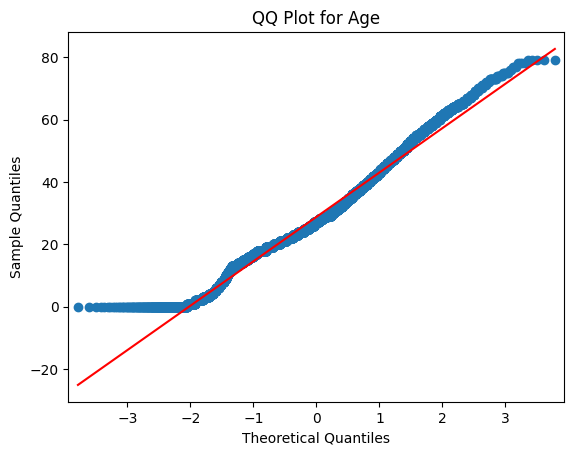

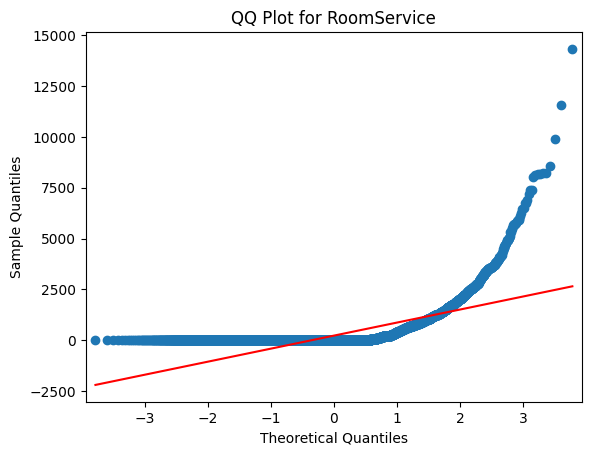

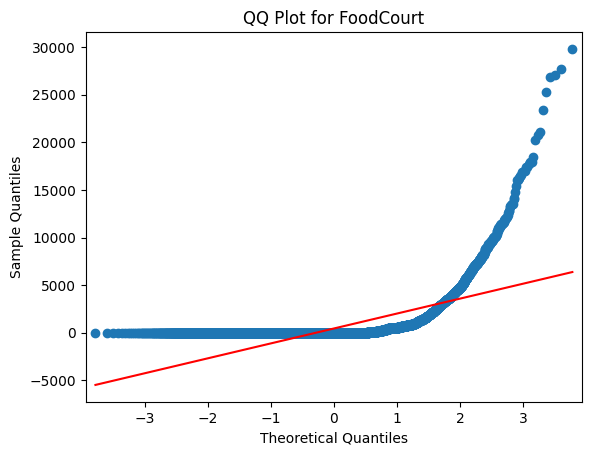

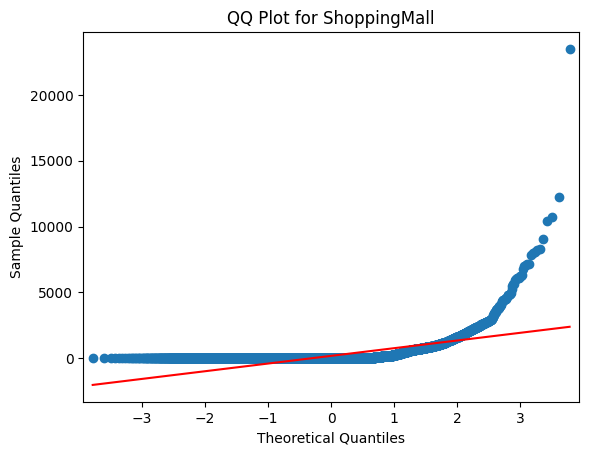

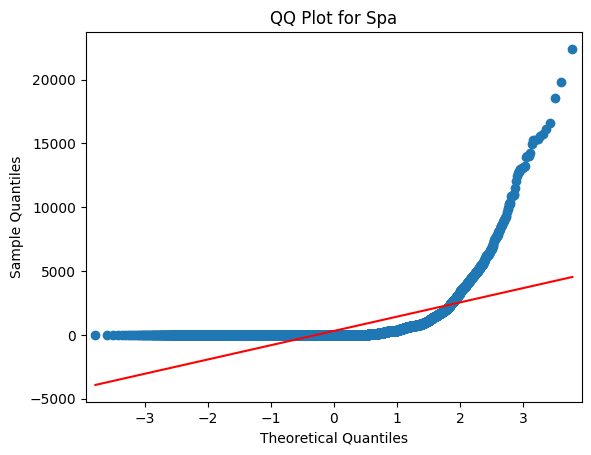

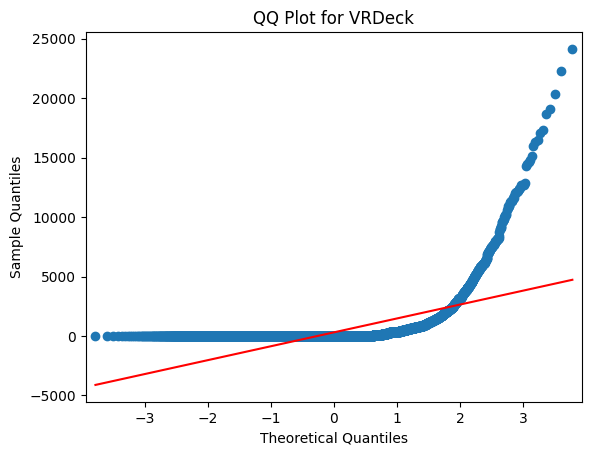

In [30]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

numeric_columns = ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']

for column in numeric_columns:
    sm.qqplot(df[column], line='s')
    plt.title(f"QQ Plot for {column}")
    plt.show()



## Step 5: Apply Transformations

Apply transformations to the data if required, based on the normality check results.

Common transformations include:

* Logarithmic transformation: Use when data is positively skewed.
* Square root transformation: Use when data has a moderate positive skew.
* Power transformation: Use when data has a severe positive or negative skew.

Apply the chosen transformation(s) to the appropriate features.

In [30]:
# def transformation_numerical(col):
#     #select only the numeric columns
#     numeric_columns = df.select_dtypes(include=np.number).columns
#     numeric_data=df[numeric_columns]
#     #perform logarithmic transformation
#     log_transformed_df=np.log1p(numeric_data)
#     sqrt_transformed_df=np.sqrt(numeric_data)
#     power_transformed_df=np.power(numeric_data,2)
#     reciprocal_transformed_df=1/(numeric_data+1)

#     #plot the original and transformed data for single column
#     column=col
#     plt.figure(figsize=(10,5))
#     plt.subplot(2,2,1)
#     plt.hist(numeric_data[column],bins=20)
#     plt.title(f'{column} in original data')
#     plt.subplot(2,2,2)
#     plt.hist(log_transformed_df[column], bins=20)
#     plt.title(f'{column} in Logarithmic Transformation')
#     plt.subplot(2,2,3)
#     plt.hist(sqrt_transformed_df[column], bins=20)
#     plt.title(f'{column} in Square Root Transformation')
#     plt.subplot(2,2,4)
#     plt.hist(power_transformed_df[column], bins=20)
#     plt.title(f'{column} in Power Transformation')
#     plt.subplot(2,2,5)
#     plt.tight_layout()
#     plt.show()

In [32]:
def transformation_numerical(col):
    # Select only the numeric columns
    numeric_columns = df.select_dtypes(include=np.number).columns
    numeric_data = df[numeric_columns]
    
    # Perform logarithmic, square root, and power transformations
    log_transformed_df = np.log1p(numeric_data)
    sqrt_transformed_df = np.sqrt(numeric_data)
    power_transformed_df = np.power(numeric_data, 2)
    
    # Plot the original and transformed data
    fig, axes = plt.subplots(1, 4, figsize=(20, 4))
    
    # Plot the original data
    axes[0].hist(df[col], bins=20)
    axes[0].set_title('Original ' + col)
    axes[0].set_xlabel('Values')
    axes[0].set_ylabel('Frequency')
    
    # Plot the logarithmically transformed data
    axes[1].hist(log_transformed_df[col], bins=20)
    axes[1].set_title('Logarithmic Transformation of ' + col)
    axes[1].set_xlabel('Transformed Values')
    axes[1].set_ylabel('Frequency')
    
    # Plot the square root transformed data
    axes[2].hist(sqrt_transformed_df[col], bins=20)
    axes[2].set_title('Square Root Transformation of ' + col)
    axes[2].set_xlabel('Transformed Values')
    axes[2].set_ylabel('Frequency')
    
    # Plot the power transformed data
    axes[3].hist(power_transformed_df[col], bins=20)
    axes[3].set_title('Power Transformation of ' + col)
    axes[3].set_xlabel('Transformed Values')
    axes[3].set_ylabel('Frequency')
    
    # Adjust the spacing between subplots
    plt.tight_layout()
    
    # Display the plots
    plt.show()


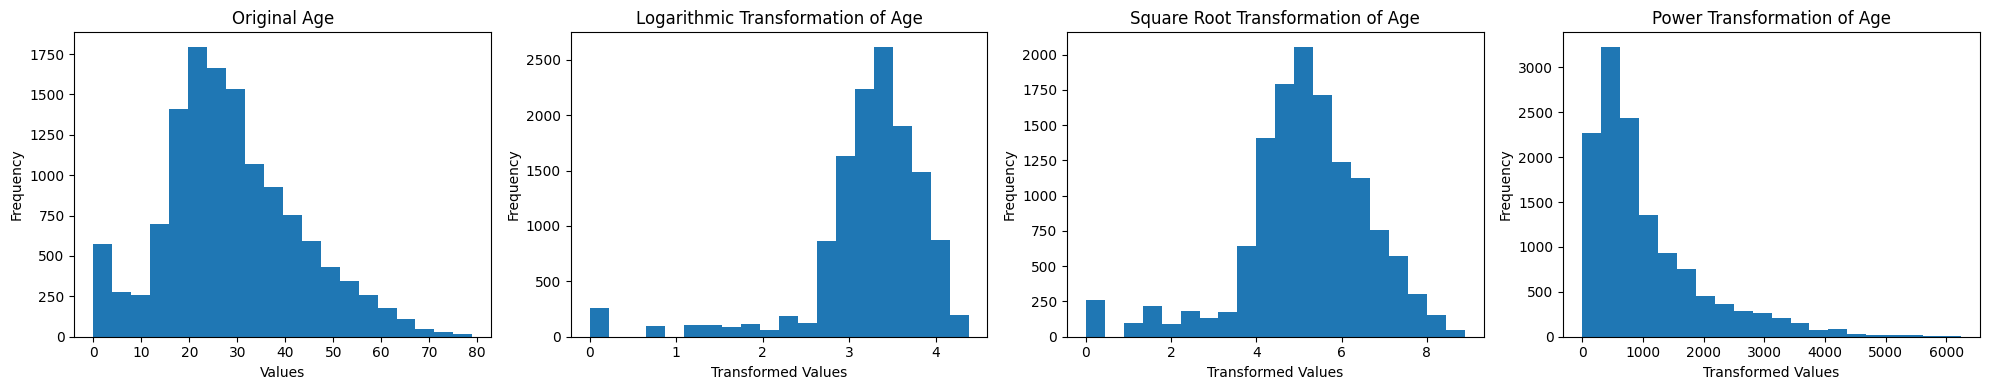

In [33]:
transformation_numerical('Age')

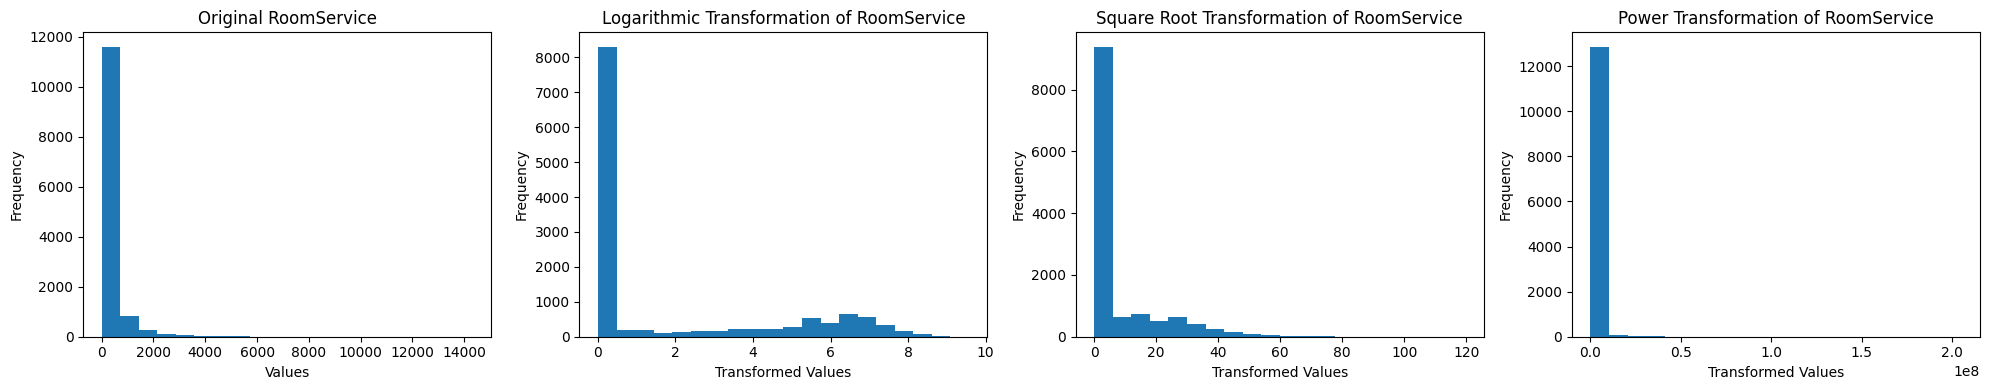

In [34]:
transformation_numerical('RoomService')

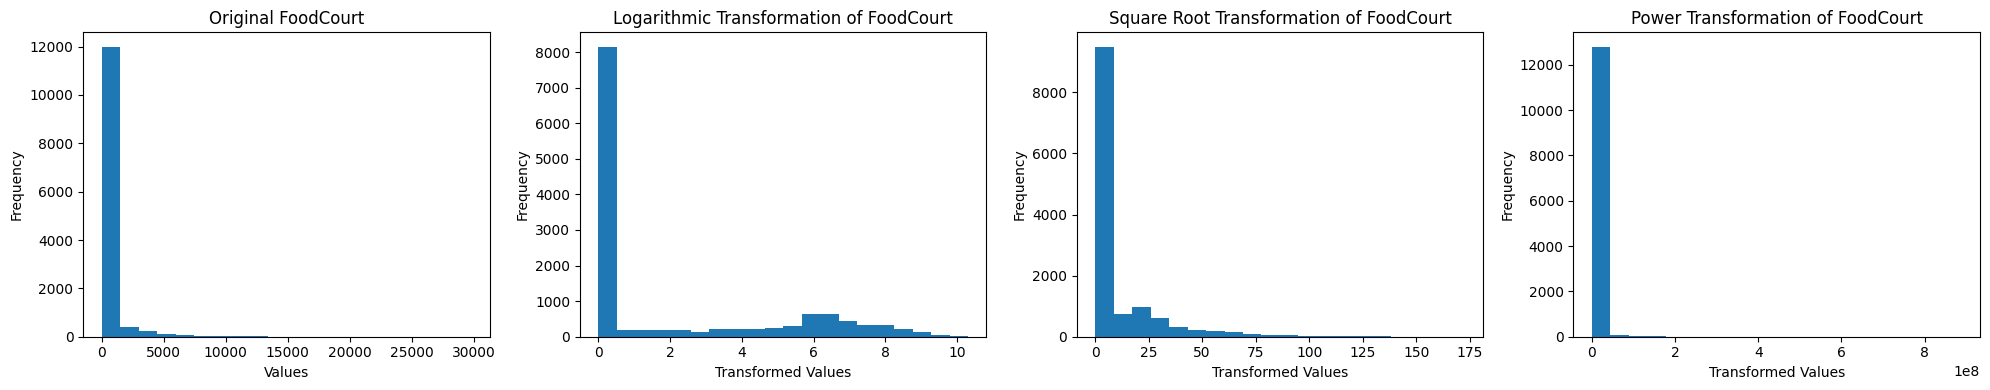

In [35]:
transformation_numerical('FoodCourt')

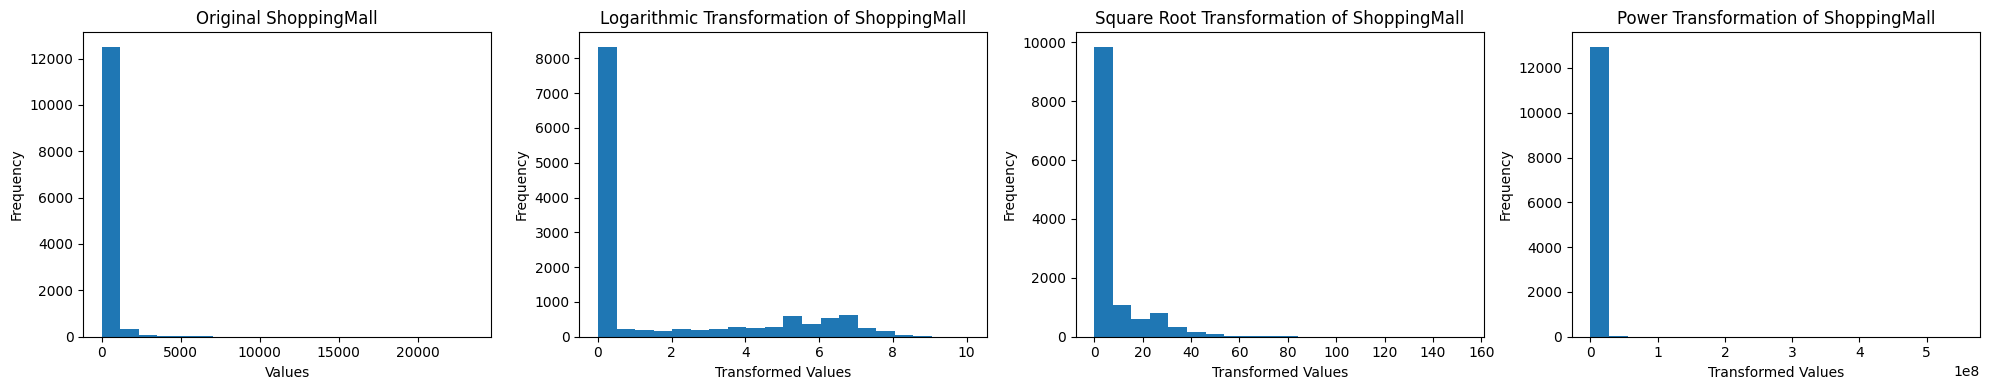

In [36]:
transformation_numerical('ShoppingMall')

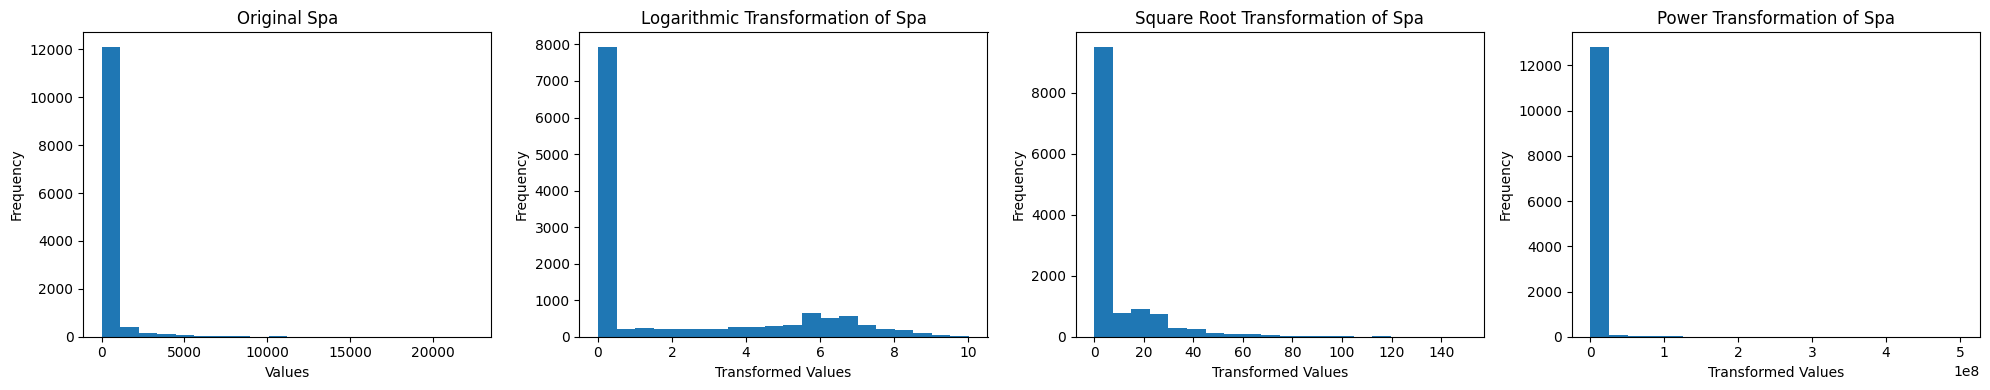

In [37]:
transformation_numerical('Spa')

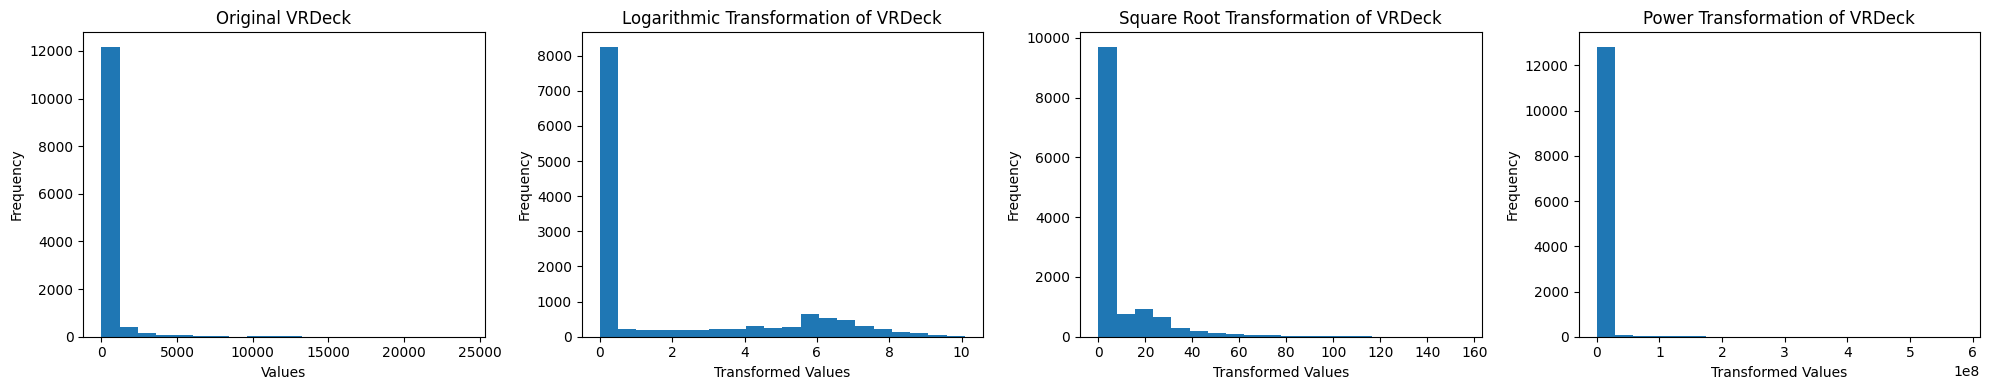

In [38]:
transformation_numerical('VRDeck')

In [39]:
import statsmodels.api as sm
def normality_b_a_transformed(col):
    column = col
    numeric_columns = df.select_dtypes(include=np.number).columns
    numeric_data = df[numeric_columns]

    log_transformed_df = np.log1p(numeric_data)
    sqrt_transformed_df = np.sqrt(numeric_data)
    power_transformed_df = np.power(numeric_data, 2)

    sm.qqplot(numeric_data[column],line='s')
    plt.title(f"QQ Plot for {column} in Original Data")
    plt.show()
    sm.qqplot(log_transformed_df[column],line='s')
    plt.title(f"QQ Plot for {column} in Logarithmic Transformed Data")
    plt.show()
    sm.qqplot(sqrt_transformed_df[column],line='s')
    plt.title(f"QQ Plot for {column} in Square Root Transformed Data")
    plt.show()
    sm.qqplot(power_transformed_df[column],line='s')
    plt.title(f"QQ Plot for {column} in Power Transformed Data")
    plt.show()

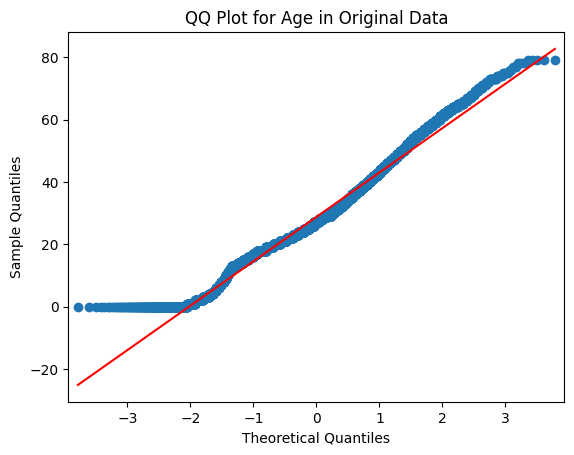

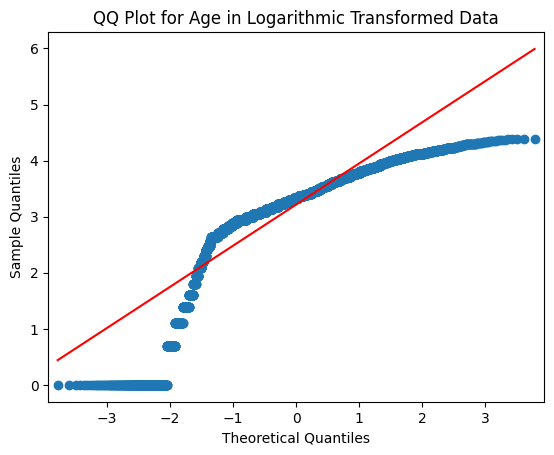

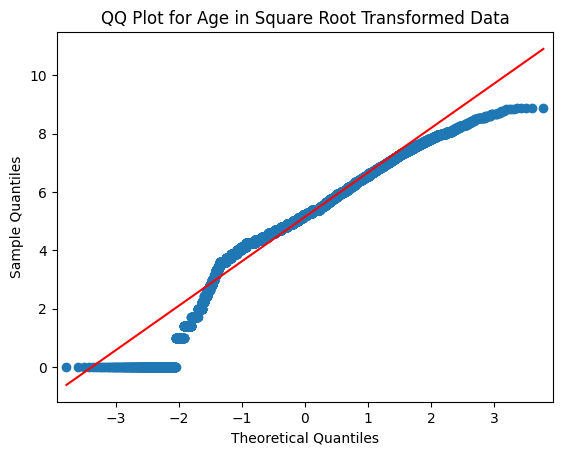

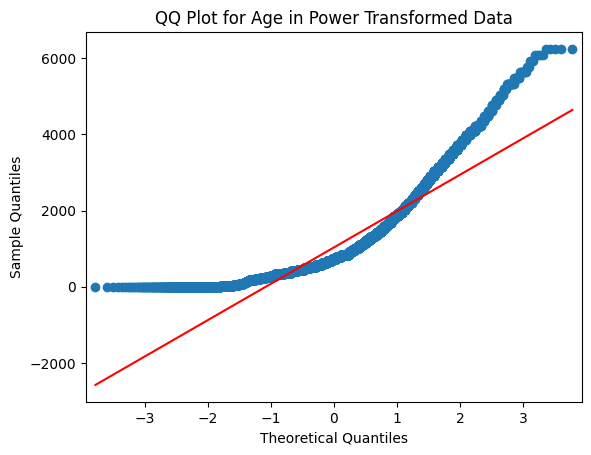

In [40]:
normality_b_a_transformed('Age')

In [41]:
numeric_data = df.select_dtypes(include=np.number)
sqrt_transformed_data = np.sqrt(numeric_data)
sqrt_transformed_df = pd.DataFrame(sqrt_transformed_data, columns=numeric_data.columns)

log_transformed_data = np.log1p(numeric_data)
log_transformed_df = pd.DataFrame(log_transformed_data, columns=numeric_data.columns)

df['Age'] = sqrt_transformed_df['Age']

#I used squareroot transformation on age column

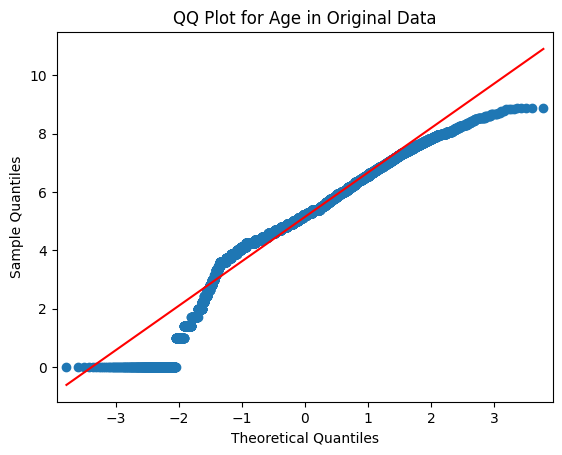

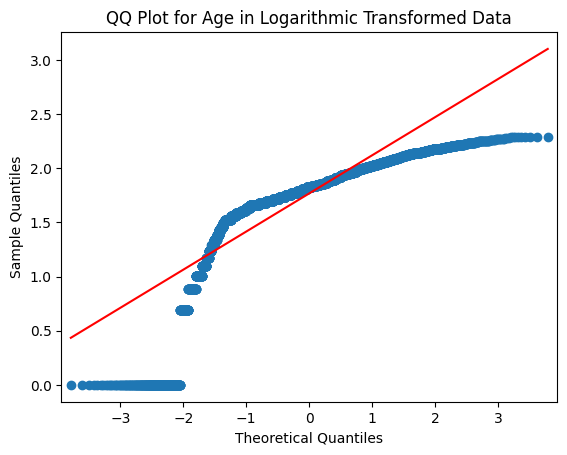

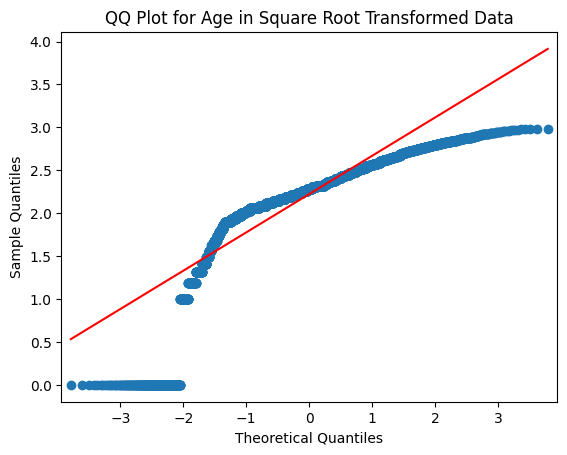

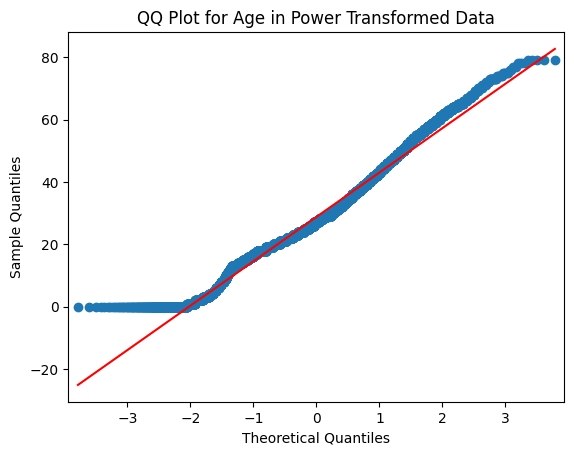

In [44]:
normality_b_a_transformed('Age')

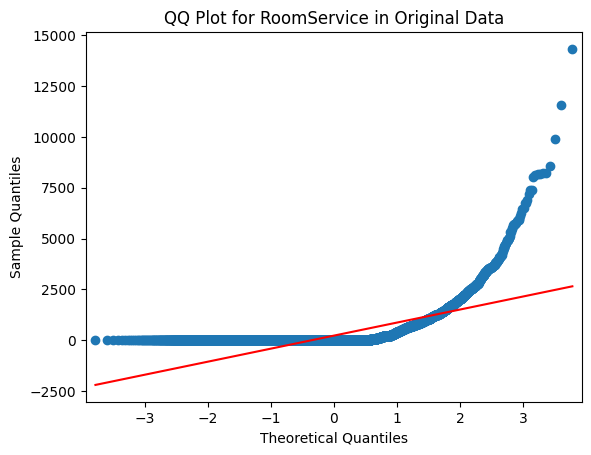

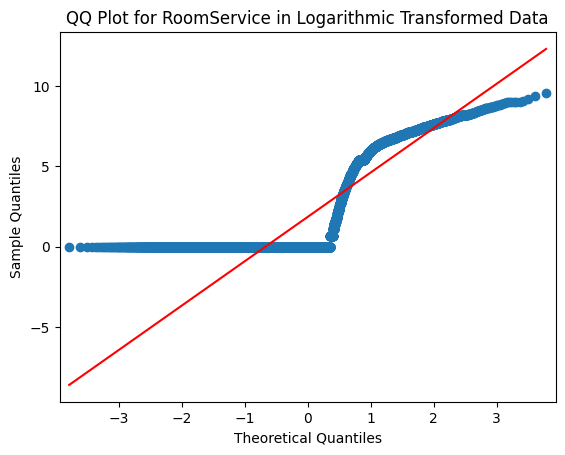

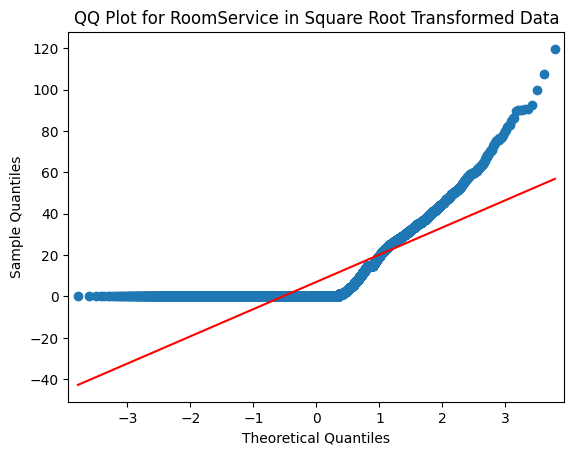

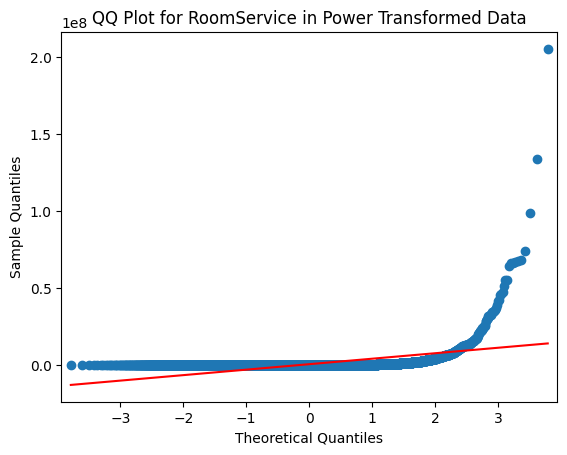

In [42]:
normality_b_a_transformed('RoomService')

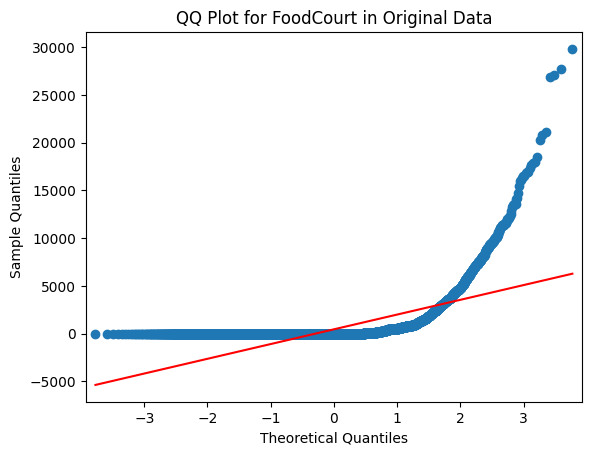

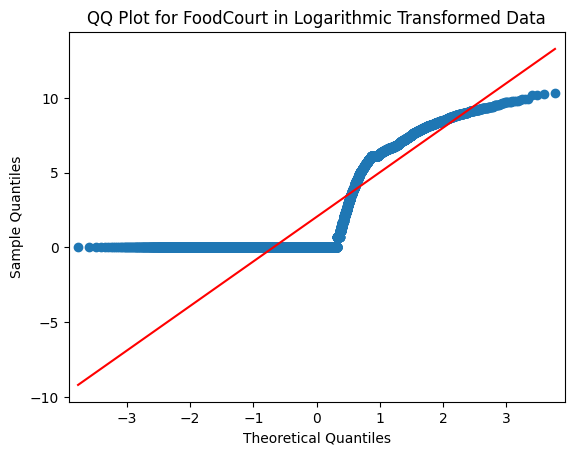

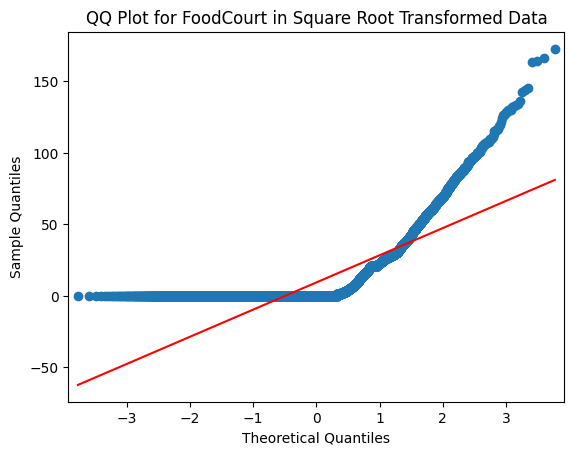

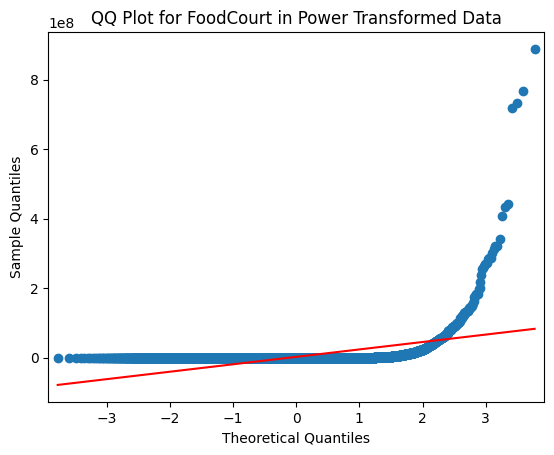

In [58]:
normality_b_a_transformed('FoodCourt')

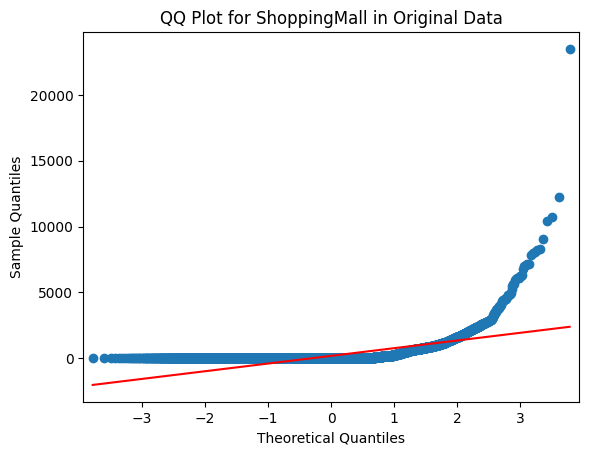

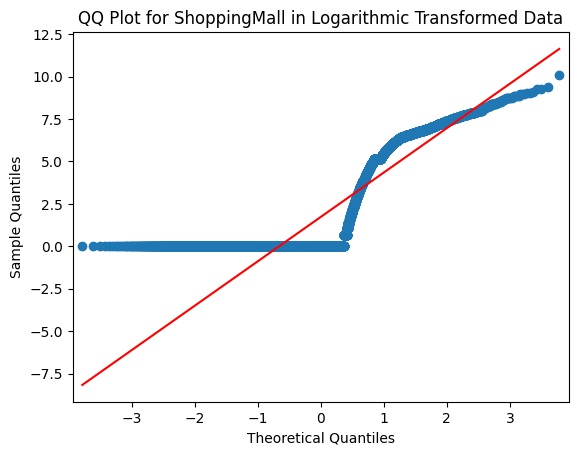

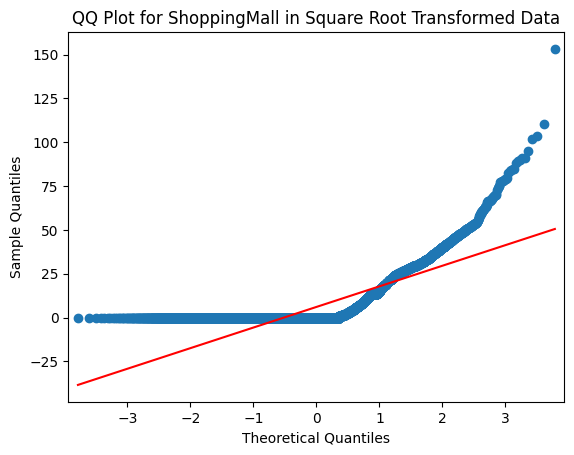

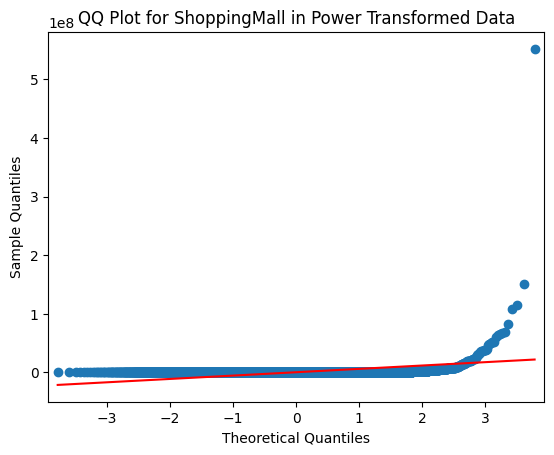

In [43]:
normality_b_a_transformed('ShoppingMall')

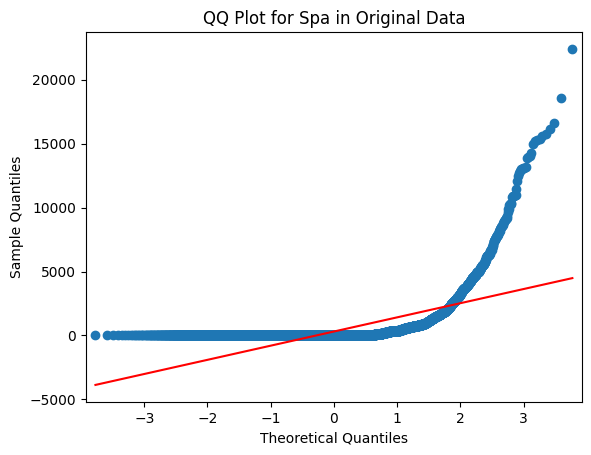

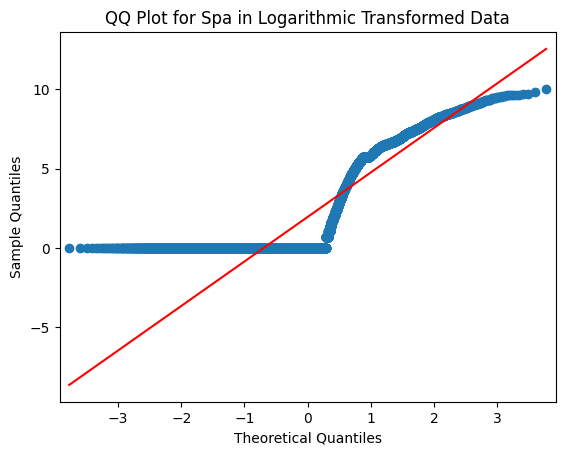

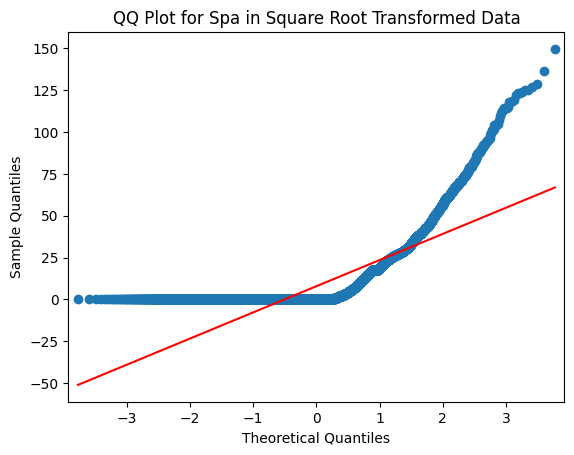

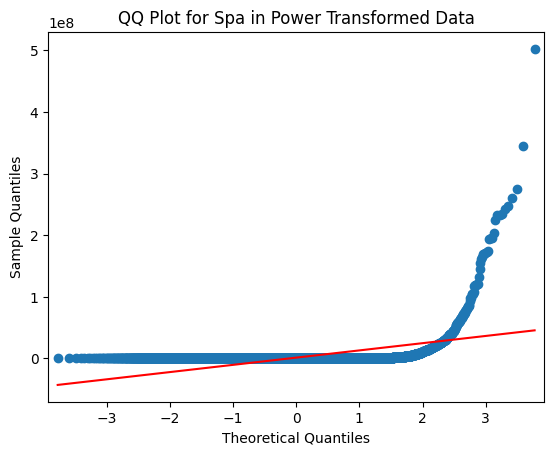

In [60]:
normality_b_a_transformed('Spa')

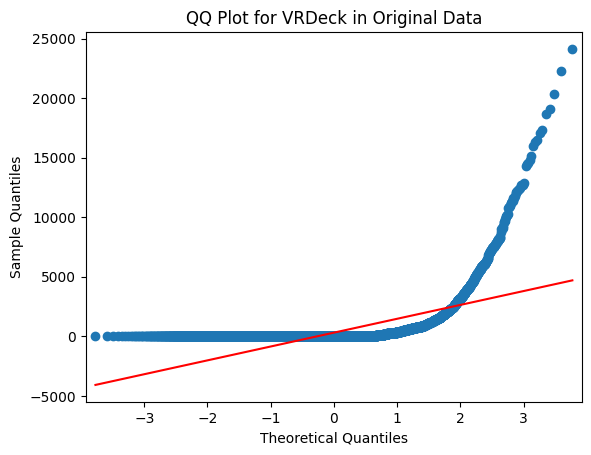

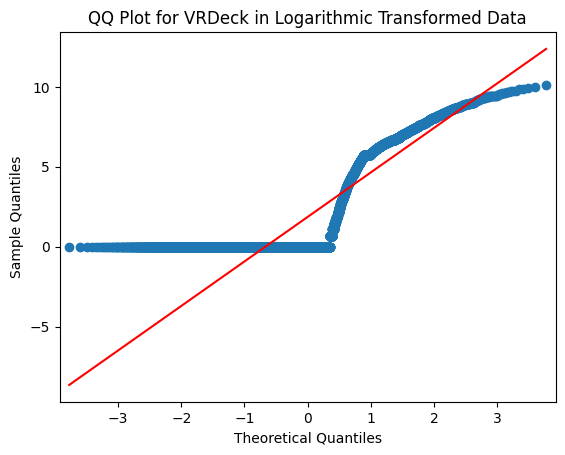

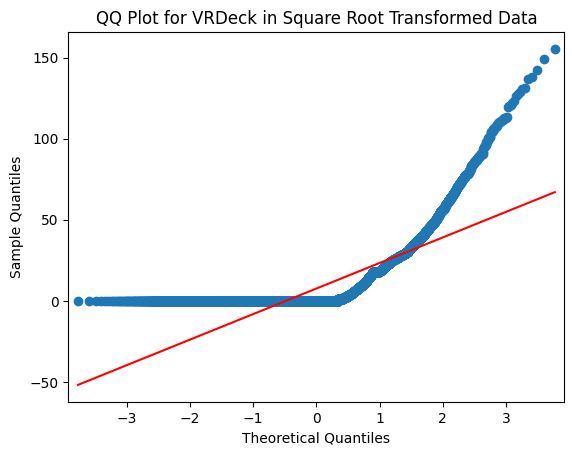

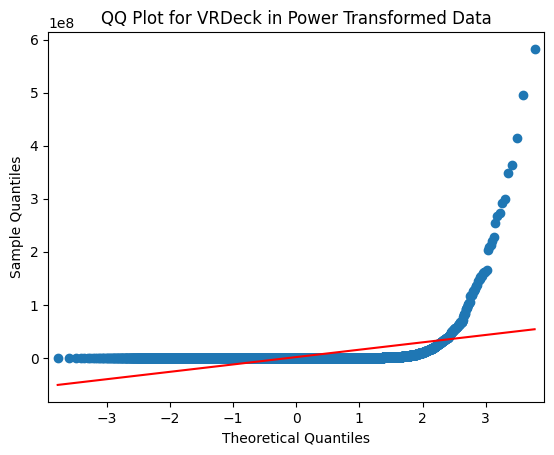

In [61]:
normality_b_a_transformed('VRDeck')

## Step 6: Split the Data

Split the preprocessed and transformed data into training and testing sets.
Typically, use around 70-80% of the data for training and the remaining for testing.

In [45]:
## drop unnecessary columns
df = df.drop(columns=['Name', 'HomePlanet','Cabin','Destination'], axis=1)
df.head()

,Unnamed: 0,PassengerId,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,0,0001_01,0.0,6.244998,0.0,0.0,0.0,0.0,0.0,0.0,False
1,1,0002_01,0.0,4.898979,0.0,109.0,9.0,25.0,549.0,44.0,True
2,2,0003_01,0.0,7.615773,1.0,43.0,3576.0,0.0,6715.0,49.0,False
3,3,0003_02,0.0,5.744563,0.0,0.0,1283.0,371.0,3329.0,193.0,False
4,4,0004_01,0.0,4.000000,0.0,303.0,70.0,151.0,565.0,2.0,True


In [46]:
from sklearn.model_selection import train_test_split, cross_val_score

# Determination of independent variables and target variable
X = df[['Age']]
y = df['Transported']
# Splitting the data set into train and test sets
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state=42)


## Step 7: Select a Suitable Algorithm

Determine the appropriate algorithm(s) for this binary classification problem.
Consider algorithms like **Logistic Regression, Decision Trees, Random Forests, or Support Vector Machines.**
Choose an algorithm that suits the problem requirements and constraints.

In [47]:
df.dropna(inplace=True)

## I try all the models and see which one is more suitable.

### Logistic Regression

In [48]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Prepare dataset and target variable
X = df.drop('Transported', axis=1)
y = df['Transported']

# Separate training and test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions on the test dataset
y_pred = model.predict(X_test)

# Show the classification report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

       False       0.90      0.82      0.86      1630
        True       0.71      0.83      0.76       845

    accuracy                           0.82      2475
   macro avg       0.80      0.83      0.81      2475
weighted avg       0.84      0.82      0.83      2475



### Decision Trees

In [49]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Prepare dataset and target variable
X = df.drop('Transported', axis=1)
y = df['Transported']

# Separate training and test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the decision tree model
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

# Make predictions on the test dataset
y_pred = model.predict(X_test)

# Show the classification report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

       False       0.83      0.82      0.82      1630
        True       0.66      0.67      0.67       845

    accuracy                           0.77      2475
   macro avg       0.74      0.75      0.75      2475
weighted avg       0.77      0.77      0.77      2475



### Support Vector Machines

In [52]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Prepare dataset and target variable
X = df.drop('Transported', axis=1)
y = df['Transported']

# Separate training and test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the SVC model
model = SVC()
model.fit(X_train, y_train)

# Make predictions on the test dataset
y_pred = model.predict(X_test)

# Show the classification report
print(classification_report(y_test, y_pred))
 

              precision    recall  f1-score   support

       False       0.66      1.00      0.79      1630
        True       0.00      0.00      0.00       845

    accuracy                           0.66      2475
   macro avg       0.33      0.50      0.40      2475
weighted avg       0.43      0.66      0.52      2475



c:\Users\90506\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\90506\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\90506\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

## Step 8: Train the Model

Train the selected algorithm on the training dataset.
Adjust hyperparameters if necessary to optimize model performance.
Evaluate the model's performance using suitable metrics (accuracy, precision, recall, etc.).

#### Try Logistic regression

In [44]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Create the model
model = LogisticRegression()

# Train the model
model.fit(train_X, train_y)

# Making predictions on the test set
y_pred = model.predict(test_X)

# Evaluate model performance
accuracy = accuracy_score(test_y, y_pred)
precision = precision_score(test_y, y_pred)
recall = recall_score(test_y, y_pred)
f1 = f1_score(test_y, y_pred)

# Print performance metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Accuracy: 0.6576715497301465
Precision: 0.0
Recall: 0.0
F1-score: 0.0


c:\Users\90506\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### Try Decision Tree

In [45]:
from sklearn.tree import DecisionTreeClassifier

# Create the model
model = DecisionTreeClassifier()

# Train the model
model.fit(train_X, train_y)

# Making predictions on the test set
y_pred = model.predict(test_X)

# Evaluate model performance
accuracy = accuracy_score(test_y, y_pred)
precision = precision_score(test_y, y_pred)
recall = recall_score(test_y, y_pred)
f1 = f1_score(test_y, y_pred)

# Print performance metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)


Accuracy: 0.661526599845798
Precision: 0.5333333333333333
Recall: 0.09009009009009009
F1-score: 0.15414258188824664


#### Try SVC

In [46]:
from sklearn.svm import SVC

# Create the model
model = SVC()

# Train the model
model.fit(train_X, train_y)

# Making predictions on the test set
y_pred = model.predict(test_X)

# Evaluate model performance
accuracy = accuracy_score(test_y, y_pred)
precision = precision_score(test_y, y_pred)
recall = recall_score(test_y, y_pred)
f1 = f1_score(test_y, y_pred)

# Print performance metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)


Accuracy: 0.6588280647648419
Precision: 0.5194805194805194
Recall: 0.04504504504504504
F1-score: 0.08290155440414507


# Step 9: Validate the Model

Use the testing dataset to validate the model's performance.
Calculate the same metrics as in step 8 to assess the model's accuracy and generalization ability.
Identify any issues like overfitting or underfitting.

#### Logistic Regression

In [47]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Veri kümesini eğitim ve test veri kümesi olarak ayırın
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state=42)

# Create teh model
model = LogisticRegression()

# Train the model
model.fit(test_X, test_y)

# Making predictions on the test set
y_pred = model.predict(test_X)

#  Evaluate model performance
accuracy = accuracy_score(test_y, y_pred)
precision = precision_score(test_y, y_pred)
recall = recall_score(test_y, y_pred)
f1 = f1_score(test_y, y_pred)

# print performance metric
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)


Accuracy: 0.8254545454545454
Precision: 0.7117948717948718
Recall: 0.821301775147929
F1-score: 0.7626373626373627


c:\Users\90506\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


#### Decision Tree

In [48]:
from sklearn.tree import DecisionTreeClassifier

# Create the model
model = DecisionTreeClassifier()

# Train the model
model.fit(test_X, test_y)

# Making predictions on the test set
y_pred = model.predict(test_X)

# Evaluate model performance
accuracy = accuracy_score(test_y, y_pred)
precision = precision_score(test_y, y_pred)
recall = recall_score(test_y, y_pred)
f1 = f1_score(test_y, y_pred)

# Print performance metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)


Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-score: 1.0


#### SVC

In [49]:
from sklearn.svm import SVC

# Create the model
model = SVC()

# Train the model
model.fit(test_X, test_y)

# Making predictions on the test set
y_pred = model.predict(test_X)

# Evaluate model performance
accuracy = accuracy_score(test_y, y_pred)
precision = precision_score(test_y, y_pred)
recall = recall_score(test_y, y_pred)
f1 = f1_score(test_y, y_pred)

# Print performance metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)


Accuracy: 0.6585858585858586
Precision: 0.0
Recall: 0.0
F1-score: 0.0


c:\Users\90506\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Step 10: Fine-tune and Optimize the Model

If needed, fine-tune the model by adjusting hyperparameters or trying different algorithms.
Employ techniques like cross-validation or grid search to find the best hyperparameters.
Iterate this process until you achieve satisfactory performance.

In [50]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Create the model
model = DecisionTreeClassifier()

# Train the model
model.fit(train_X, train_y)

# Make predictions on test data
predictions = model.predict(test_X)

# Evaluate performance
accuracy = accuracy_score(test_y, predictions)
precision = precision_score(test_y, predictions)
recall = recall_score(test_y, predictions)
f1 = f1_score(test_y, predictions)

# Print performance metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)


Accuracy: 0.7676767676767676
Precision: 0.65625
Recall: 0.6710059171597633
F1-score: 0.6635459332943242


In [51]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# Create the model
model = DecisionTreeClassifier()

# Define the hyperparameter grid
param_grid = {
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 3, 5]
}

# Grid search with GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5)
grid_search.fit(train_X, train_y)

# Get the best hyperparameter combination and score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Score:", best_score)
print("Accuracy:", accuracy)


Best Parameters: {'max_depth': 7, 'min_samples_leaf': 3, 'min_samples_split': 2}
Best Score: 0.8297656708571312
Accuracy: 0.7676767676767676


## Step 11: Evaluate the Final Model

Evaluate the final model on the testing dataset once again.
Calculate relevant metrics to assess the model's accuracy, precision, recall, etc.
Interpret the model's predictions and document the results.


In [53]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Make predictions on test data
predictions = model.predict(test_X)

# Evaluate performance
accuracy = accuracy_score(test_y, predictions)
precision = precision_score(test_y, predictions)
recall = recall_score(test_y, predictions)
f1 = f1_score(test_y, predictions)

# Print performance metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)


ValueError: The feature names should match those that were passed during fit.
Feature names seen at fit time, yet now missing:
- CryoSleep
- FoodCourt
- PassengerId
- RoomService
- ShoppingMall
- ...


## Step 12: Communicate the Findings

Prepare a report or presentation summarizing the project's objectives, methodology, and results.
Clearly communicate the insights gained from the model, such as the importance of different features in predicting survival.
Provide recommendations or potential applications based on the findings.

## Step 13: Reflect and Learn

Reflect on the entire process and discuss the strengths and limitations of the project.
Identify areas for improvement and suggest future work or possible enhancements.
Share any lessons learned from the project to inform future endeavors.
Remember, adapt this guide based on the specific requirements and learning goals of your charity data bootcamp organization.